# Results of different f values

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
results = pd.read_csv('./f_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','f','num_agents'], as_index=False).mean()
results.head()

,planner,f,num_agents,num_robots,d,active_time,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,1.1,300,10.0,5.0,1257.569149,1257.569149,1.237693,166235.868627,300.0
1,IterativeAssignmentPlanner,1.2,300,10.0,5.0,724.956294,724.956294,1.231792,88996.940175,300.0
2,IterativeAssignmentPlanner,1.3,300,10.0,5.0,532.344146,532.344146,1.271257,63225.223589,300.0
3,IterativeAssignmentPlanner,1.4,300,10.0,5.0,431.965138,431.965138,1.280019,49796.669362,300.0
4,IterativeAssignmentPlanner,1.5,300,10.0,5.0,363.631914,363.631914,1.282013,41205.499769,300.0


In [7]:
num_agents = 300

results = results.loc[results['num_agents']==num_agents]

planners_names = [
    'StaticLinePlanner', 'TravelingLinePlanner','SeparateTravelingPlanner','IterativeAssignmentPlanner','KmeansAssignmentPlanner']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* agent num n is 300

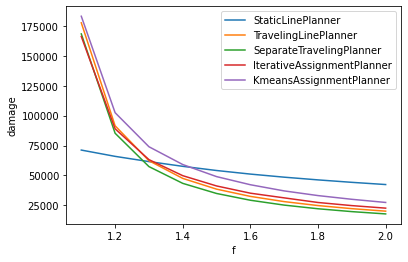

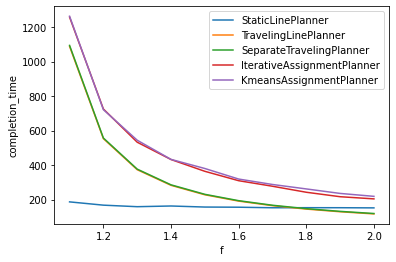

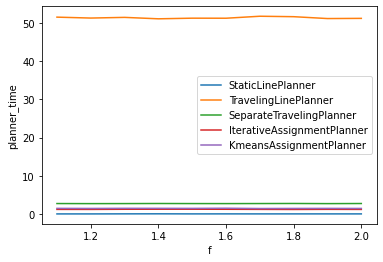

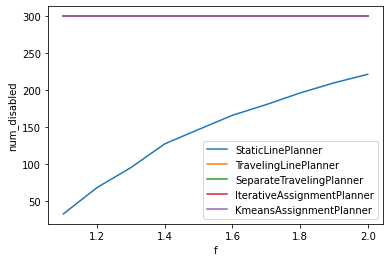

In [8]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['f' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for r in planners_results:
        plt.plot(list(r[x]),list(r[y]))

    plt.legend(planners_names)
    plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()